# TASK 5: Sales Prediction 

# Defination of the Problem: 

The purpose of this project is to estimate the sales by utilising Support Vector Regressor (SVR). Dividing the category into training and testing data to find highest R-square value.

## Importing the basic libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## Read the given Advertising data set 

In [47]:
adv=pd.read_csv("Advertising.csv")
adv

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [48]:
adv.shape

(200, 5)

## Exploratory Data Analysis(EDA)

In [49]:
adv.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [50]:
adv.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [51]:
#Checking null values 
adv.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [52]:
adv.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [53]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [54]:
adv.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [55]:
adv.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [84]:
import warnings
warnings.filterwarnings('ignore') 

In [56]:
#dropping the unnecessary column
adv=adv.drop(columns=['Unnamed: 0'],axis=1)

In [57]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Visualization 

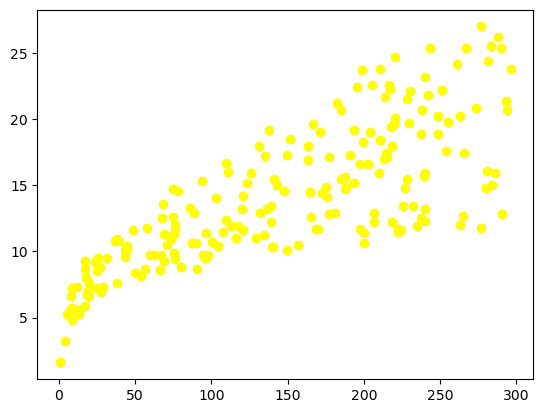

In [61]:
plt.scatter(adv['TV'],adv["Sales"],color="yellow")
plt.show()

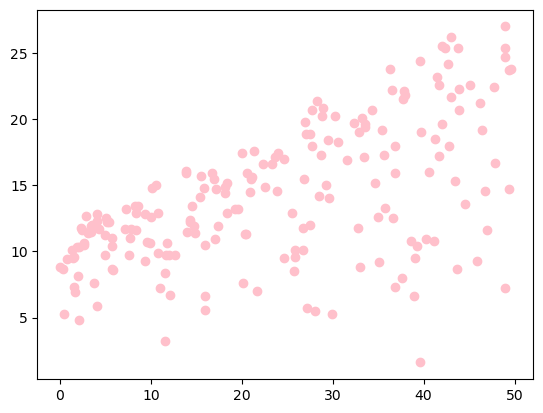

In [63]:
plt.scatter(adv['Radio'],adv["Sales"],color="pink")
plt.show()

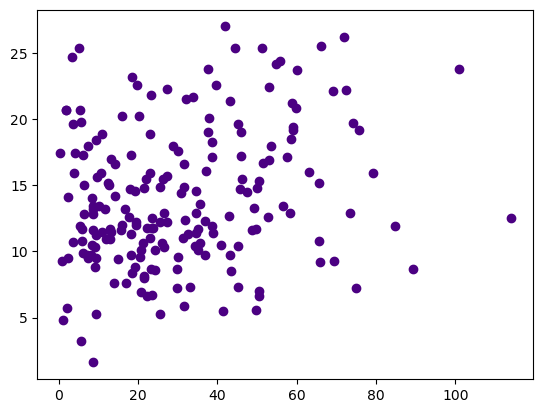

In [64]:
plt.scatter(adv['Newspaper'],adv["Sales"],color="indigo")
plt.show()

In [66]:
# checking correlation 
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


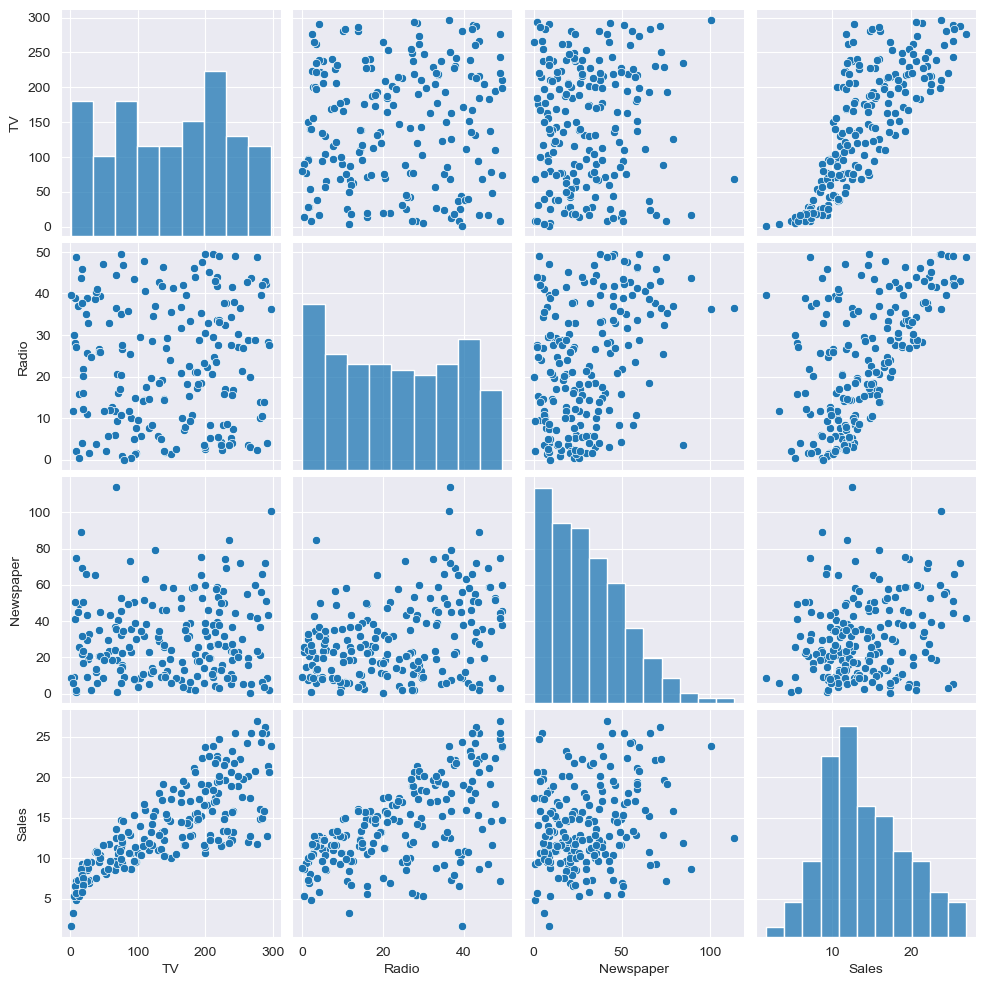

In [86]:
sns.set_style(style='darkgrid')
sns.pairplot(adv)

# Dividing the data

In [69]:
x=adv.drop('Sales',axis=1) 
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [71]:
y=adv['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## splitting the data into train and test 

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [73]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(134, 3) (66, 3) (134,) (66,)


## Fitting a model 

In [77]:
# create an instance of the SVM (support Vector Machine)
from sklearn.svm import SVR #Support vector regressor
model=SVR(kernel='linear', C=1)

In [78]:
# fitting the clasifier to tran the data
model.fit(x_train, y_train)

SVR(C=1, kernel='linear')

## Prediction 

In [79]:
# make predictions on the test data
y_pred=model.predict(x_test)
y_pred

array([16.83315352, 21.60483319, 21.51354155, 11.67749522, 22.94652289,
       13.89860872, 21.69708277,  7.8790657 , 13.28654794, 15.39210909,
        9.8981584 ,  6.86913295, 13.74487214,  9.94258481,  9.55958755,
       12.04623959,  9.61733217, 16.50752434, 10.77906778, 19.0586938 ,
       19.71744783, 13.89984681, 13.51585236, 21.50408004,  8.1871043 ,
        5.97175187, 21.36380669, 12.21022088,  9.46128072,  9.49480497,
       12.17261721, 10.57729301, 22.10891522, 13.31887792, 17.93481621,
       20.5480081 , 15.3767186 , 20.83465977, 11.33856575,  4.80753342,
        9.78257399, 12.66656274, 10.80809722,  8.60329129, 13.13780876,
        5.70449408,  9.66033129, 14.54485966,  8.87522483, 12.36874699,
       16.55914782, 11.83571242, 14.09816011, 11.93954789,  6.66997588,
        9.90651367, 10.00726247, 24.36649832,  8.43386128, 12.28293019,
       17.39804089, 15.48427305, 11.71652106, 11.78254232, 16.27387289,
        7.54647089])

## Evaluating the performance for advertising data
- mean square error(mse)
- root mean square error(rmse)
- r square(r^2)

In [80]:
# calculate the accuracy of the regression 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4.329919787604721


In [81]:
# root mean square error(rmse)
import math 
rmse = math.sqrt(mse)
print('Root mean square error:', rmse)

Root mean square error: 2.0808459307706375


In [82]:
# r square(r^2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R_square:', r2)

R_square: 0.8322319454919381


# Conclusion:

R-square=83%